In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [3]:
excel_file=r"D:\OneDrive\Documents\professional\20210710lifeBuddy\misc\excel_solver_optimization.xlsx"
df=pd.read_excel(excel_file,sheet_name='data')

In [7]:
observed_x=df.time.to_list()
observed_y=df.heartrate.to_list()

In [4]:
#Model -- Is this matching what I have in excel Michaelis-M eq sheet, D5?
def func_m(time_var, max_var, shape_var):
    return (max_var *time_var)/(shape_var + time_var)

In [12]:
#perform curve
popt, pcov = curve_fit(func_m, observed_x, observed_y)
popt

array([ 10.283599  , -18.90347909])

In [22]:
#This is found in excel workbook in Michaelis-M eq sheet, column L
optimized_parameters_excel=[147.7072, 3.57971]

In [23]:
predicted_y=[func_m(i, *popt) for i in observed_x]
predicted_y_excel=[func_m(i, *optimized_parameters_excel) for i in observed_x]

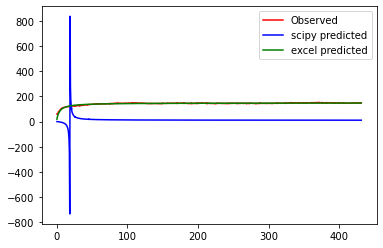

In [26]:
plt.plot(observed_x, observed_y,'r', label='Observed')
plt.plot(observed_x, predicted_y,'b', label='scipy predicted')
plt.plot(observed_x, predicted_y_excel,'g', label='excel predicted')
plt.legend(loc='best')
plt.show()